In [ ]:
import os
import glob
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
def plot_class_distribution(data):
  plt.figure(figsize=(10, 6))
  plt.bar(data.keys(), data.values(), color='skyblue')
  plt.xticks(rotation=45)
  plt.xlabel("lable")
  plt.ylabel("Count")
  plt.title("Distribution of Cars")
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()

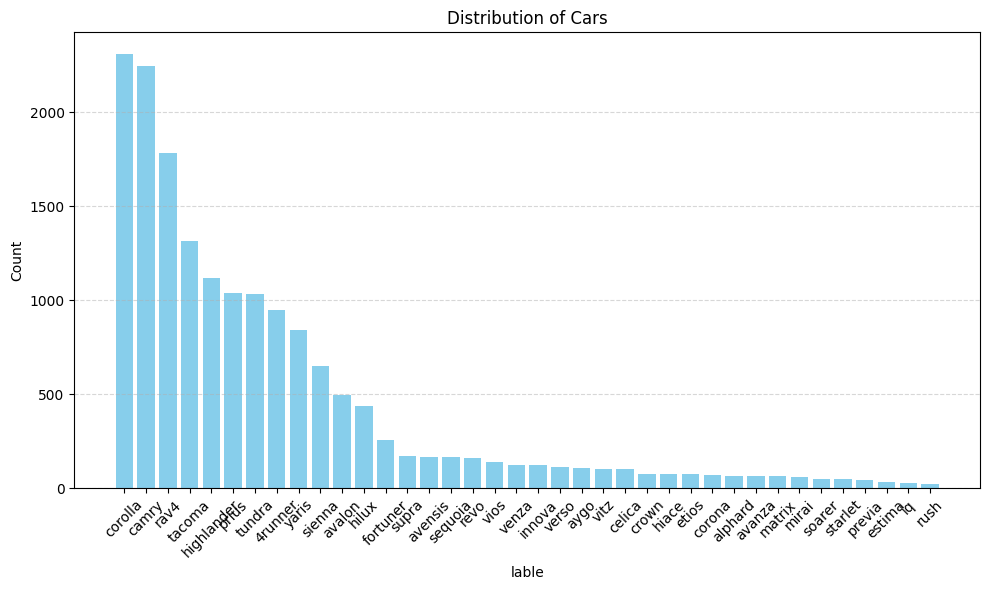

In [ ]:
data_dir = "/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars"


class_counts = {}
for class_name in sorted(os.listdir(data_dir)):
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder):
        num_images = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.png'))])
        class_counts[class_name] = num_images

sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

plot_class_distribution(sorted_counts)

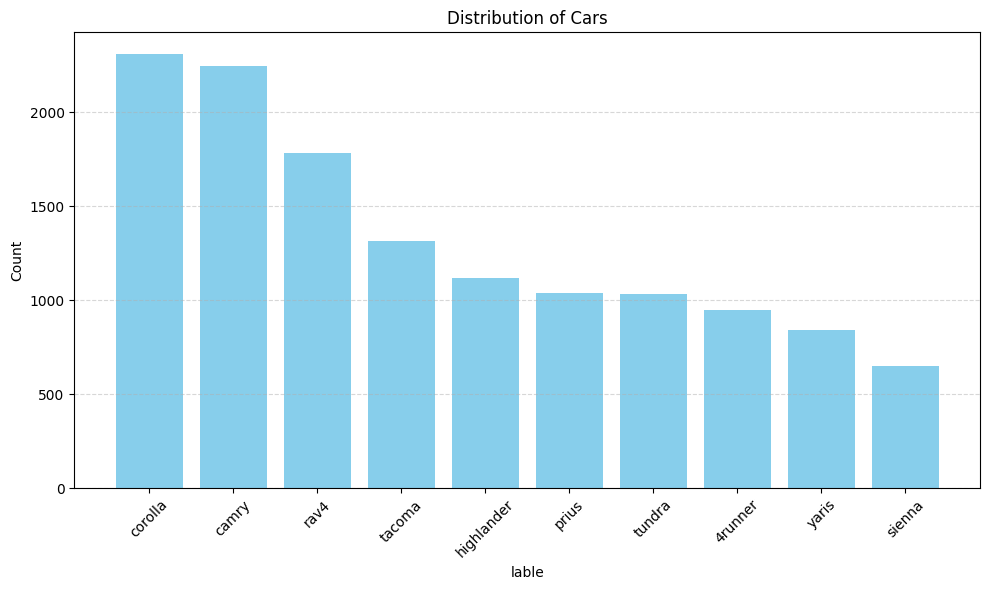

In [ ]:
selected_classes = [
    'corolla', 'camry', 'rav4', 'tacoma', 'highlander',
    'prius', 'tundra', '4runner', 'yaris', 'sienna'
]
class_counts = {}
for class_name in selected_classes:
    class_folder = os.path.join(data_dir, class_name)
    if os.path.isdir(class_folder):
        num_images = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.png'))])
        class_counts[class_name] = num_images
    else:
        class_counts[class_name] = 0

sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))
plot_class_distribution(sorted_counts)

In [ ]:
def get_label_from_class(class_name):
    label_map = {
    'corolla': 0,
    'camry': 1,
    'rav4': 2,
    'tacoma': 3,
    'highlander': 4,
    'prius': 5,
    'tundra': 6,
    '4runner': 7,
    'yaris': 8,
    'sienna': 9
    }
    return label_map.get(class_name, -1)  

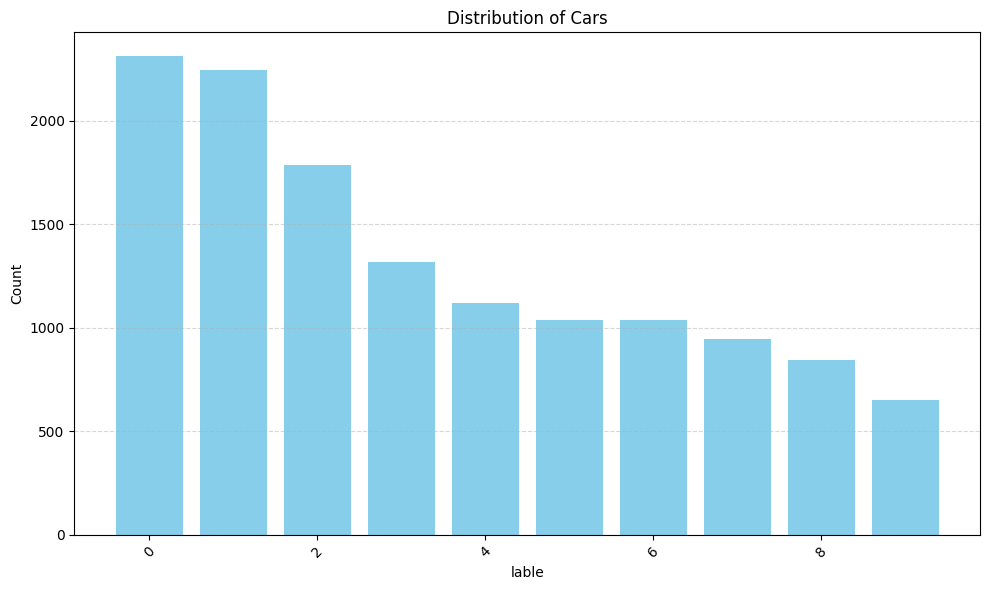

In [ ]:
image_paths=[]
image_labels=[]


for class_name in selected_classes:
    folder_path = os.path.join(data_dir, class_name)
    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith(('.jpg', '.png')):
            image_paths.append(os.path.join(folder_path, img_file))
            image_labels.append(get_label_from_class(class_name))


label_counts = Counter(image_labels)
label_counts = dict(sorted(label_counts.items()))

plot_class_distribution(label_counts)

In [ ]:
import os
from PIL import Image
from torchvision import transforms
from collections import defaultdict
import random
from tqdm import tqdm

label_map = {
    'corolla': 0,
    'camry': 1,
    'rav4': 2,
    'tacoma': 3,
    'highlander': 4,
    'prius': 5,
    'tundra': 6,
    '4runner': 7,
    'yaris': 8,
    'sienna': 9
    }

id_to_class = {v: k for k, v in label_map.items()}

class_counts = defaultdict(int)
for label in image_labels:
    class_counts[label] += 1
max_count = max(class_counts.values())

augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(0.3, 0.3, 0.3),
])


new_image_paths = image_paths.copy()
new_image_labels = image_labels.copy()


label_to_paths = defaultdict(list)
for path, label in zip(image_paths, image_labels):
    label_to_paths[label].append(path)

# A code from ChatGPT for some unkown images
for label, paths in tqdm(label_to_paths.items(), desc="در حال augment"):
    n_current = len(paths)
    n_needed = max_count - n_current
    class_name = id_to_class[label]
    class_dir = os.path.dirname(paths[0])  #

    for i in range(n_needed):
        orig_path = random.choice(paths)
        try:
            img = Image.open(orig_path).convert("RGB")
            aug_img = augment_transform(img)

            
            save_path = os.path.join(class_dir, f"aug_{label}_{i}.jpg")
            aug_img.save(save_path)

         
            new_image_paths.append(save_path)
            new_image_labels.append(label)
        except Exception as e:
            print(f"خطا در پردازش {orig_path}: {e}")

در حال augment:  20%|██        | 2/10 [00:26<01:46, 13.30s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
در حال augment:  80%|████████  | 8/10 [24:16<07:44, 232.29s/it]

خطا در پردازش /content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-1129278736.jpg: cannot identify image file '/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-1129278736.jpg'
خطا در پردازش /content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-1129278736.jpg: cannot identify image file '/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-1129278736.jpg'
خطا در پردازش /content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-2000577211.jpg: cannot identify image file '/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-2000577211.jpg'
خطا در پردازش /content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-11292787

در حال augment: 100%|██████████| 10/10 [32:08<00:00, 192.88s/it]


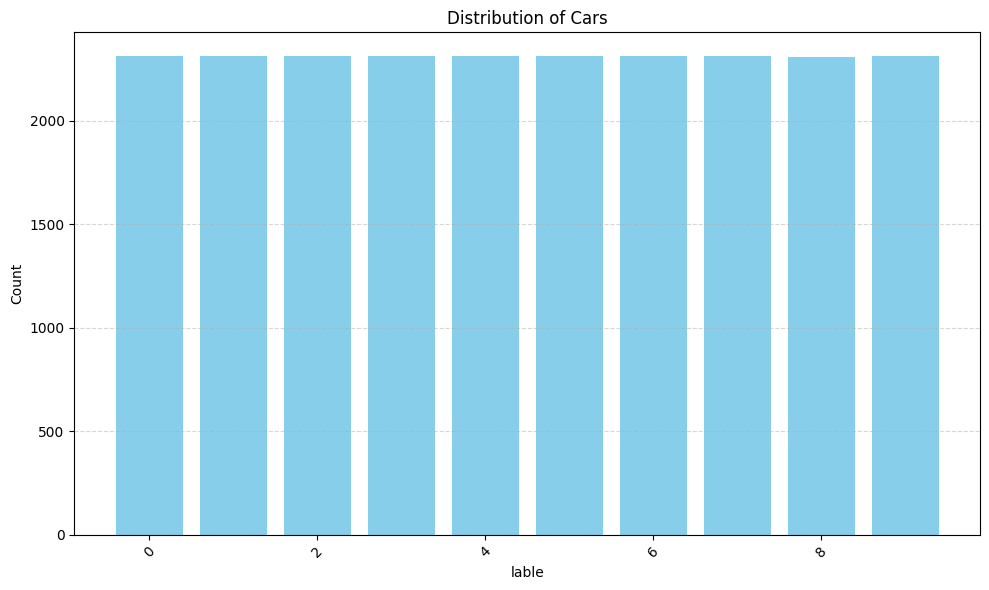

In [ ]:
image_paths=[]
image_labels=[]


for class_name in selected_classes:
    folder_path = os.path.join(data_dir, class_name)
    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith(('.jpg', '.png')):
            image_paths.append(os.path.join(folder_path, img_file))
            image_labels.append(get_label_from_class(class_name))


label_counts = Counter(image_labels)
label_counts = dict(sorted(label_counts.items()))

plot_class_distribution(label_counts)

In [ ]:
resized_dataset_dir = "/content/drive/MyDrive/Deep_learning/Tamrin2/Resized_dataset"
os.makedirs(resized_dataset_dir, exist_ok=True)

id_to_class = {v: k for k, v in label_map.items()}

resize_transform = transforms.Resize((224, 224))

for path, label in tqdm(zip(image_paths, image_labels), total=len(image_paths), desc="resizing"):
    try:
        img = Image.open(path).convert("RGB")
        resized_img = resize_transform(img)

        class_name = id_to_class[label]
        save_dir = os.path.join(resized_dataset_dir, class_name)
        os.makedirs(save_dir, exist_ok=True)

        filename = os.path.basename(path)
        save_path = os.path.join(save_dir, filename)

        resized_img.save(save_path)
    except Exception as e:
        print(f"err{path}: {e}")

resizing:   5%|▍         | 1150/23106 [06:01<1:49:36,  3.34it/s]

err/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/corolla/corolla-1385218315.jpg: cannot identify image file '/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/corolla/corolla-1385218315.jpg'


resizing:  15%|█▌        | 3505/23106 [18:02<1:23:34,  3.91it/s]

err/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/camry/camry-1361471237.jpg: cannot identify image file '/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/camry/camry-1361471237.jpg'


resizing:  80%|████████  | 18546/23106 [43:47<04:16, 17.79it/s]

err/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-1129278736.jpg: cannot identify image file '/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-1129278736.jpg'


resizing:  82%|████████▏ | 18916/23106 [44:15<03:28, 20.12it/s]

err/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-2000577211.jpg: cannot identify image file '/content/drive/MyDrive/Deep_learning/Tamrin2/toyota_dataset/toyota_image_dataset_v2/toyota_cars/yaris/yaris-2000577211.jpg'


resizing: 100%|██████████| 23106/23106 [46:26<00:00,  8.29it/s]


In [ ]:
import os


resized_dataset_dir = "/content/drive/MyDrive/Deep_learning/Tamrin2/Resized_dataset"
label_map = {
    'corolla': 0,
    'camry': 1,
    'rav4': 2,
    'tacoma': 3,
    'highlander': 4,
    'prius': 5,
    'tundra': 6,
    '4runner': 7,
    'yaris': 8,
    'sienna': 9
    }
image_paths = []
image_labels = []

for class_name in os.listdir(resized_dataset_dir):
    class_dir = os.path.join(resized_dataset_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    label = label_map[class_name]
    for img_file in os.listdir(class_dir):
        if img_file.lower().endswith(('.jpg', '.png')):
            img_path = os.path.join(class_dir, img_file)
            image_paths.append(img_path)
            image_labels.append(label)

In [ ]:
from sklearn.model_selection import train_test_split

train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, image_labels, test_size=0.2, stratify=image_labels, random_state=42
)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

to_tensor_transform = transforms.Compose([
    transforms.ToTensor() 
])

class SimpleImageDataset(Dataset):
    def __init__(self, paths, labels, transform=None):
        self.paths = paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

In [ ]:
train_dataset = SimpleImageDataset(train_paths, train_labels, transform=to_tensor_transform)
test_dataset = SimpleImageDataset(test_paths, test_labels, transform=to_tensor_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=50)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=50)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 50 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
from torch.utils.data import DataLoader
import torch

def extract_features(model, dataloader, device='cuda'):
    all_features = []
    all_labels = []

    model = model.to(device)

    with torch.no_grad(): 
        for imgs, labels in dataloader:
            imgs = imgs.to(device)
            features = model(imgs)  
            all_features.append(features.cpu().numpy()) 
            all_labels.extend(labels.numpy()) 

  
    all_features = np.vstack(all_features) 
    all_labels = np.array(all_labels)

    return all_features, all_labels

def flatten_features(features):
    batch_size = features.shape[0]
    return features.view(batch_size, -1) 

In [ ]:
import torch
from torchvision import models

model_vgg16 = models.vgg16(pretrained=True)
model_vgg16 = torch.nn.Sequential(*list(model_vgg16.children())[:-1])
model_vgg16.eval() 


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 142MB/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import numpy as np

train_features, train_labels = extract_features(model_vgg16, train_loader, device='cpu')
test_features, test_labels = extract_features(model_vgg16, test_loader, device='cpu')
train_features = flatten_features(torch.tensor(train_features))
test_features = flatten_features(torch.tensor(test_features))
np.savez('train_features.npz', features=train_features, labels=train_labels)
np.savez('test_features.npz', features=test_features, labels=test_labels)
!cp  /content/test_features.npz /content/drive/MyDrive/Deep_learning/Tamrin2/VGGFeature
!cp  /content/train_features.npz /content/drive/MyDrive/Deep_learning/Tamrin2/VGGFeature


In [ ]:
!cp  /content/test_features.npz /content/drive/MyDrive/Deep_learning/Tamrin2/VGGFeature

In [ ]:
!cp  /content/train_features.npz /content/drive/MyDrive/Deep_learning/Tamrin2/VGGFeature

In [ ]:
import torch
from torchvision import models

model_alexnet = models.alexnet(pretrained=True)
model_alexnet = torch.nn.Sequential(*list(model_alexnet.children())[:-1])
model_alexnet.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 141MB/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): AdaptiveAvgPool2d(output_size=(6, 6))
)